In [28]:
import sys
sys.path.insert(0, '..')

from vqvae import VQVAEModel
import torch
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [2]:
model = VQVAEModel.load_from_checkpoint("../logs/0412.1417_mnist/mnist.ckpt")
codebook = model.vq.embedding.weight.detach().numpy()
codebook.shape

VQVAEModel(
  (encoder): SimpleEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (res1): ResBlock(
      (conv1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    )
    (res2): ResBlock(
      (conv1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (decoder): SimpleDecoder(
    (conv1): Conv2d(2, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (res1): ResBlock(
      (conv1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    )
    (res2): ResBlock(
      (conv1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1

In [49]:
data = MNIST("../data", train=False, transform=ToTensor())
img, lbl = data[42]

with torch.inference_mode():
    z = model.encoder(img.unsqueeze(0))
    z_2d = model.vq.proj(z).squeeze().permute(1, 2, 0).view(-1, 2)
    z_q, _, _ = model.vq(z)
    recon_img = model.decoder(z_q).squeeze()

img = img.squeeze()

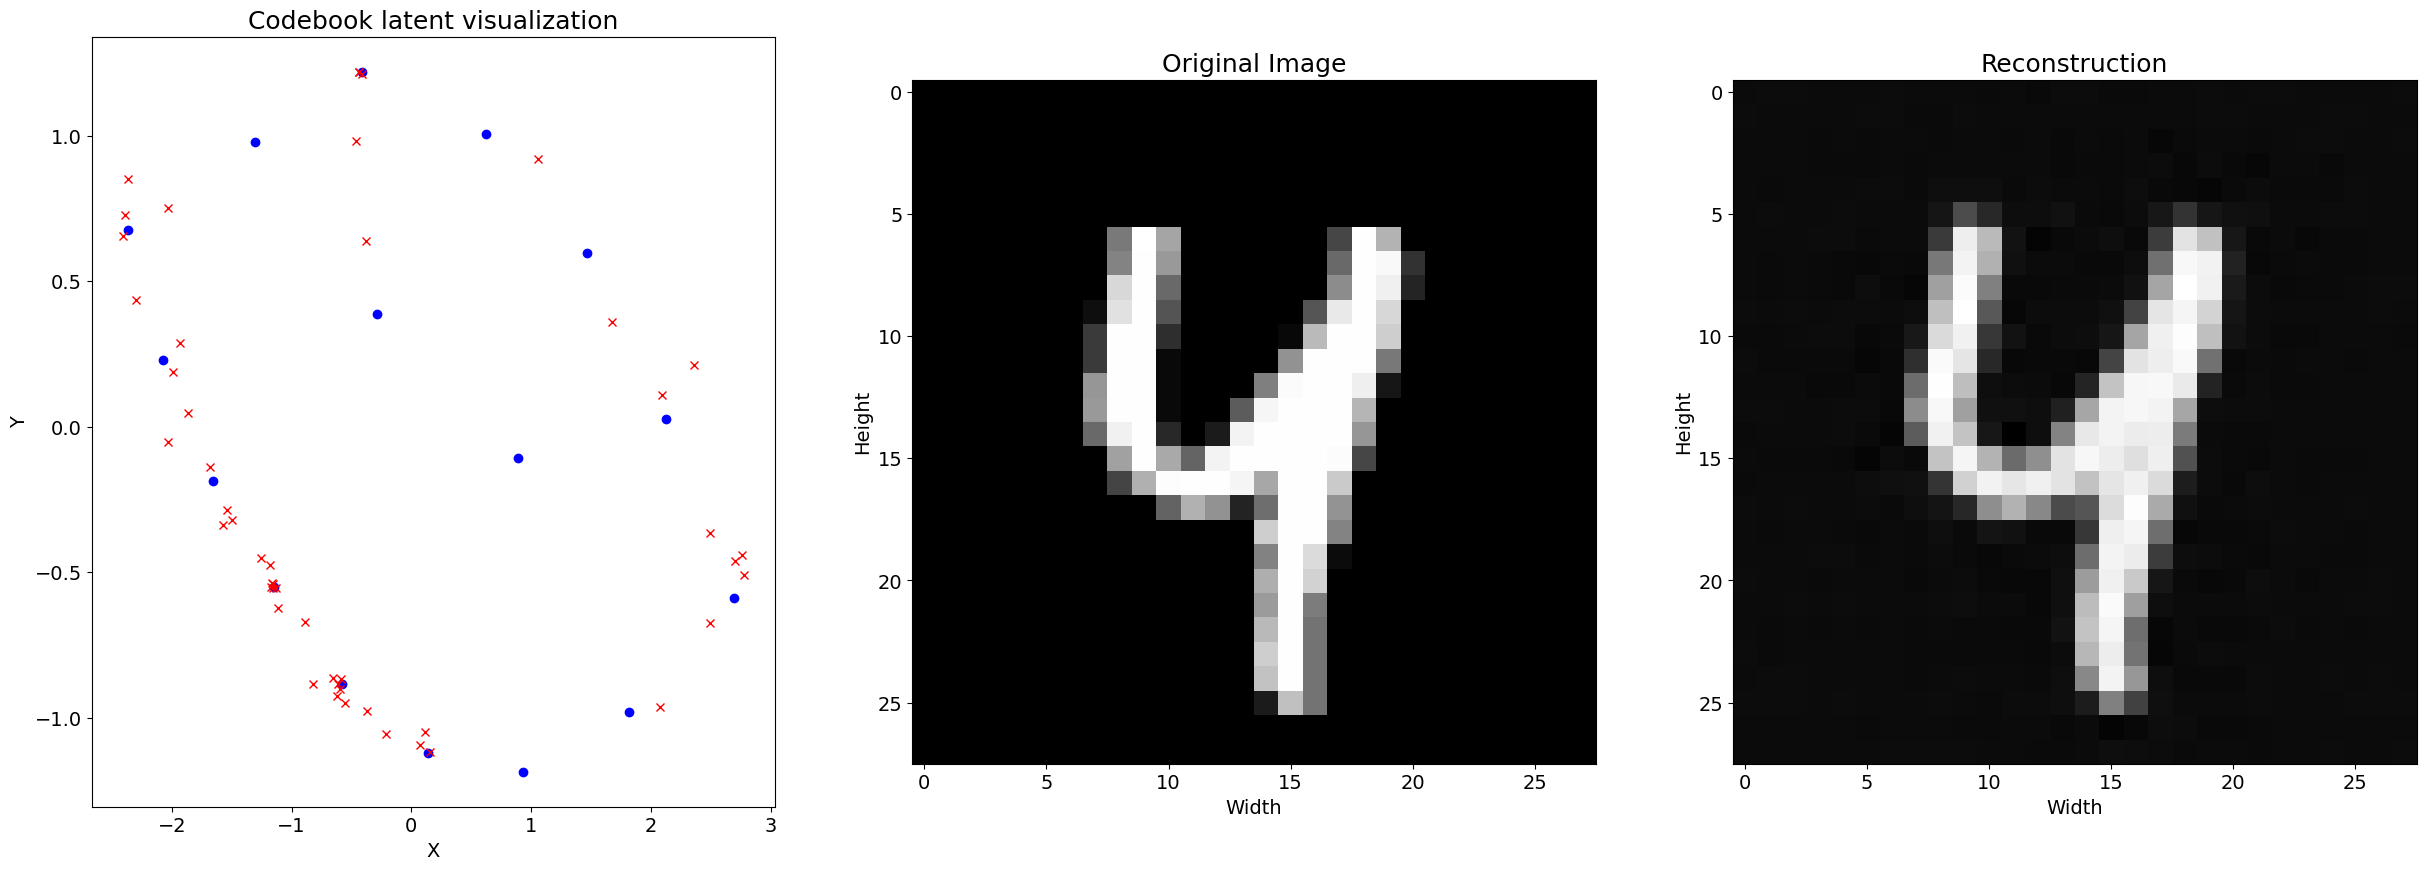

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
ax, org, rec = axs

# Codebook
ax.plot(codebook[:, 0], codebook[:, 1], 'o', color="blue")
ax.plot(z_2d[:, 0], z_2d[:, 1], 'x', color="red")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_title("Codebook latent visualization", fontsize=18)

# Original image
org.imshow(img, cmap='gray')
org.tick_params(axis='both', which='major', labelsize=14)
org.set_xlabel("Width", fontsize=14)
org.set_ylabel("Height", fontsize=14)
org.set_title("Original Image", fontsize=18)

# Reconstruction
rec.imshow(recon_img, cmap='gray')
rec.tick_params(axis='both', which='major', labelsize=14)
rec.set_xlabel("Width", fontsize=14)
rec.set_ylabel("Height", fontsize=14)
rec.set_title("Reconstruction", fontsize=18)

plt.show()
